## Classification Task

In this Notebook, MNIST dataset is used, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This is often called the “hello world” of Machine Learning. 
**The dataset can be imported from Scikit-Learn**

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)  # fetch the MNIST dataset

X, y = mnist['data'], mnist['target']  # get the features and the target

In [4]:
# Checking the shape of the features and the target

print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

Shape of features: (70000, 784)
Shape of target: (70000,)


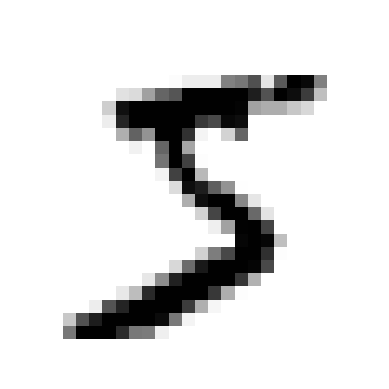

In [5]:

def plot_digit(image_data):
    '''
    Function to visualize the image data
    '''
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


some_digit = X[0] # get the first image in features
plot_digit(some_digit)
plt.show()

In [6]:
# Checking the target value of the first image

print(f"Target value of the first image: {y[0]}")

Target value of the first image: 5


### Creating a train and test set

- Don't forget to always create a test set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # The training set is already shuffled for us, which is good because this
                                                                                #guarantees that all cross-validation folds will be similar <<splitting with this approach is fine>>


# train_test_split(X, y, test_size=0.2, random_state=42) you can also use this or even stratifed sampling



#### Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for
example, the number 5. This “5-detector” will be an example of a binary
classifier, capable of distinguishing between just two classes, 5 and not-5.

In [9]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits

y_test_5 = (y_test == '5')

In [10]:
# Now let’s pick a classifier and train it. 
# A good place to start is with a Stochastic Gradient Descent (SGD) classifier,

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # There are many hyperparameters that can be set for the SGDClassifier(You can use grid search and pipeline to fine tune the modell)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# Testing the model on the first image

some_new_digit = X[0]
print(f"Prediction: {sgd_clf.predict([some_new_digit])}") # The model labels the first image as 5 - which is correct

Prediction: [ True]


### Performance Measures
- Evaluating a classifier is often significantly trickier than evaluating a
regressor

In [12]:
# Measuring Accuracy Using Cross-Validation

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# About 95% accuracy on all cross-validation folds. That's great!!

array([0.95035, 0.96035, 0.9604 ])

In [13]:
### Trying a dumb classifier that classifies every single image in the “not-5” class

from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train_5)

DummyClassifier()

In [14]:
some_new_digit = X[0]
print(f"Prediction: {dummy_classifier.predict([some_new_digit])}") # The model labels the first image as False (:-)

Prediction: [False]


In [15]:
## Measuring the cross validation accuracy for the dummy classifier
cross_val_score(dummy_classifier, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.90965, 0.90965, 0.90965])

- That’s right, it has over 90% accuracy! This is simply because only about
10% of the images are 5s, so if you always guess that an image is not a 5,
you will be right about 90% of the time.
- This demonstrates why accuracy is generally not the preferred performance
measure for classifiers, especially when you are dealing with skewed
datasets
- A better option is to use the confusion matrix

In [16]:
# Checking the confusion matrix for the SGD classifier
from sklearn.metrics import confusion_matrix

'''
To compute the confusion matrix, you first need to have a set of predictions
so that they can be compared to the actual targets. You could make
predictions on the test set, but let’s keep it untouched for now (remember
that you want to use the test set only at the very end of your project, once
you have a classifier that you are ready to launch). Instead, you can use the
cross_val_predict() function
'''

from sklearn.model_selection import cross_val_predict

y_predictions = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


### Measuring the performance of the model

In [17]:
# Now we can compute the confusion matrix

conf_matrix = confusion_matrix(y_train_5, y_predictions)

print(conf_matrix)


[[53892   687]
 [ 1891  3530]]


##### Explanation of confusion matrix

- Each row in a confusion matrix represents an actual class, while each
column represents a predicted class.
- The first row of this matrix considers non-5 images (the negative class): 53,892 of them were correctly classified
as non-5s (they are called true negatives)
- While the remaining 687 were wrongly classified as 5s (false positives, also called type I errors)
- The second row considers the images of 5s (the positive class): 1,891 werewrongly classified as non-5s (false negatives, also called type II errors)
- while the remaining 3,530 were correctly classified as 5s (true positives).

<div align='center'>
    <img src='../images/conf_matrix.png', alt='Confusion matrix' />
</div>



#### Precision and Recall


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_5, y_predictions)

recall = recall_score(y_train_5, y_predictions)

f1 = f1_score(y_train_5, y_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") # f1 score is a good metric to use when you have an imbalanced dataset

Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343847
